## Import Libraries

In [18]:
# Importing the libraries
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from numpy import trapz
import pandas as pd
import numpy as np
%matplotlib inline

## Loading the Dataset

In [19]:
# Loading The Dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create a dataframe from the iris dataset
df = pd.DataFrame(data= X, columns= iris.feature_names)

# Get unique classes
targets = np.unique(y)
print("Unique classes: ", targets)
print(iris.target_names)

print(type(y))
print(y.shape)  # shape of the targets
df.head()     # Take a look at the dataset

Unique classes:  [0 1 2]
['setosa' 'versicolor' 'virginica']
<class 'numpy.ndarray'>
(150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Create the Model

In [20]:
# Split the dataset into training(10%) and testing sets(90%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Create a logistic regression model
model = LogisticRegression(multi_class='ovr')
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set (by getting the probabilities for each of the targets)
y_pred = model.predict_proba(X_test)
#print(y_pred)



y_predicted_labels = model.predict(X_test)    # Convert probabilities to predicted labels
accuracy = accuracy_score(y_test, y_predicted_labels)     # Calculate the accuracy of the model
classification_report = classification_report(y_test, y_predicted_labels)   # Generate the classification report

# Print the results
print('Accuracy:', accuracy)
print('Classification report:\n', classification_report)

Accuracy: 0.8962962962962963
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      0.68      0.81        44
           2       0.75      1.00      0.86        43

    accuracy                           0.90       135
   macro avg       0.92      0.89      0.89       135
weighted avg       0.92      0.90      0.89       135



## Function to return the negative class

In [21]:
def return_negative_class(negative_targets, expected_target):

  # Loop through all negative targets
  for target in negative_targets:
    if(expected_target == target):
      # Return the expected negative target, otherwise return None
      return expected_target

  return None

## Confusion Matrix

In [22]:
# Function to get the confusion matrix for each class
def confusion_metrics(y_expected, y_predict, threshold, targeted_class, targets):

    true_pos, true_neg = 0.0 , 0.0
    false_pos, false_neg = 0.0 , 0.0

    # Exclude the targeted value from the targets array
    negative_targets= np.delete(targets, targeted_class)

    for i in range(len(y_predict)):

        if(np.max(y_predict[i]) >= threshold):
            if(y_expected[i] == targeted_class):
                true_pos += 1
            else:
                false_pos += 1
        elif(np.max(y_predict[i]) < threshold):
            if(y_expected[i] == return_negative_class(negative_targets, y_expected[i])):
                true_neg += 1
            else:
                false_neg += 1

    # We find the True positive rate and False positive rate based on the given threshold
    tpr = true_pos / (true_pos + false_neg)
    fpr = false_pos / (true_neg + false_pos)

    return fpr, tpr

In [23]:
fpr, tpr = confusion_metrics(y, y_pred, 0.5, 1, targets)
print(fpr , tpr)

0.9176470588235294 1.0


## Plot the Roc and get the AUC

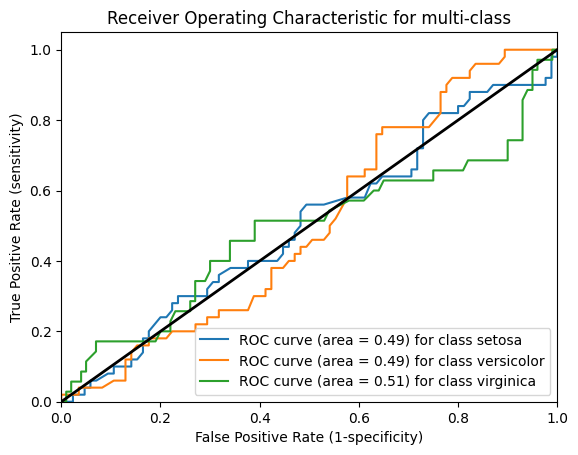

In [24]:
# Now we calculate FPR and TPR for different thresholds and get ROC and AUC(Area Under The Curve)
for target in targets:
  fpr_array = []
  tpr_array = []
  thresholds = np.linspace(0, 1, 1000)

  # Get predictions against each threshold per each class
  for threshold in thresholds:
      fpr , tpr = confusion_metrics(y, y_pred, threshold, target, targets)
      fpr_array.append(fpr)
      tpr_array.append(tpr)

  # Use Trapezoidal rule to calculate the area under the curve and approximating the intergral
  auc = np.trapz(np.array(tpr_array),np.array(fpr_array)) + 1
  plt.plot(fpr_array, tpr_array, label='ROC curve (area = %0.2f) for class %s' % (auc, iris.target_names[target]))


  #print(f"false positive rate: {fpr_array} , True positive rate: {tpr_array}")
  #print(thresholds)


plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.ylabel('True Positive Rate (sensitivity)')
plt.xlabel('False Positive Rate (1-specificity)')
plt.title('Receiver Operating Characteristic for multi-class')
plt.show()

In [ ]:
# For each epoch get the true positive and the false positive rates at different thresholds
'''for threshold in np.linspace(0, 1, 20):

        for pred_label, true_label, prob in zip(preds, labels.data, max_prob):

            if class_names[pred_label] == 'malignant' and class_names[true_label] == 'malignant':

                if prob >= threshold:
                    tp +=1
                else:
                    fn += 1

            elif class_names[pred_label] == 'malignant' and class_names[true_label] == 'benign':
                
                if prob >= threshold:
                    fp +=1
                else:
                    tn += 1

            elif class_names[pred_label] == 'benign' and class_names[true_label] == 'benign':

                if prob >= threshold:
                    tn +=1
                else:
                    fp += 1

            elif class_names[pred_label] == 'benign' and class_names[true_label] == 'malignant':

                if prob >= threshold:
                    fn +=1
                else:
                    tp += 1

        tpr = tp / (tp + fn)
        fpr = fp / (tn + fp)

        fpr_array.append(fpr)
        tpr_array.append(tpr) 

''' 